In [134]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import models
from torchsummary import summary
import torchvision.transforms as transforms
#visualize
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [135]:
test_acc = [0.65, 0.71, 0.82, 0.90, 0.91, 0.93, 0.95]
test_acc2 = [0.4, 0.5, 0.34, 0.63, 0.354, 0.12, 0.134]
test_loss = [2, 1.9, 1.5, 1.3, 1.2, 1.1, 0.5]
c = np.arange(0, len(test_acc))
d = np.arange(0, len(test_loss))

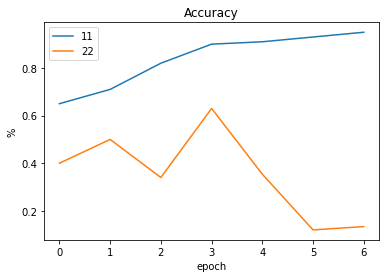

In [136]:
plt.plot(c, test_acc,label= "11")
plt.plot(c, test_acc2, label="22")
plt.title("Accuracy")
plt.xlabel("epoch")
plt.ylabel("%")
plt.legend()
plt.savefig("test")

No handles with labels found to put in legend.


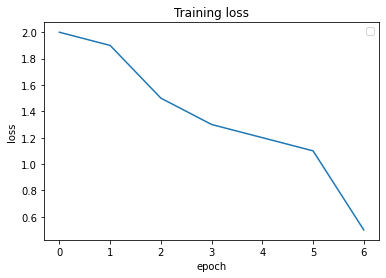

In [137]:
plt.plot(d, test_loss)
plt.title("Training loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

Files already downloaded and verified
tensor([3], device='cuda:0')
5016
tensor(3, device='cuda:0') 6 cat


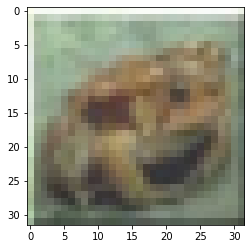

In [216]:
model = torch.load("trained.pt")
model = model.cuda()
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
for choice in range(5016, 5017):
    
    input = np.array(testset.data[choice])
    plt.imshow(input)
    input = input/255
    input_tensor = torch.from_numpy(input)
    input_tensor = input_tensor.permute(2, 0, 1)
    input_tensor = input_tensor.unsqueeze_(0).to('cuda')
    input_tensor = input_tensor.float()
    output = model(input_tensor)

    _, predicted = torch.max(output.data, 1)
    print(predicted)
    tmp = torch.softmax(output[0], 0)
    #plt.bar(testset.classes[:], tmp.cpu().detach().numpy())
    #plt.show()
    if predicted[0] != testset.targets[choice]:
        print(choice)
    print(predicted[0], testset.targets[choice], testset.classes[3])

In [204]:
if predicted[0] == 2:
    print("yes")

yes


In [157]:
output.cpu().detach().numpy()[0]

array([ 5.927108 , -4.4108615,  8.793448 ,  0.6896732, -3.8563156,
        4.884677 , -3.5220523, -2.1439269, -4.685687 , -2.1675463],
      dtype=float32)

In [87]:
model = models.vgg16(pretrained=True)
model.classifier[6] = nn.Linear(4096, 10)
model = model
torch.save(model, 'model.pt')

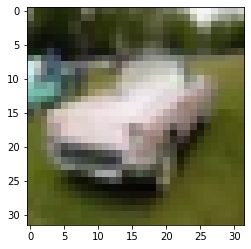

In [183]:
test = input_tensor.permute(0, 2, 3, 1)
test = test.cpu().detach().numpy()
plt.imshow(test[0]/255)

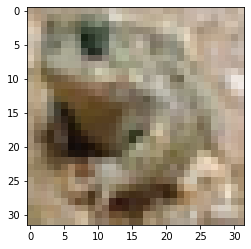

In [133]:
plt.imshow(test[0]/255)

In [130]:
test[0]

array([[[177., 158., 136.],
        [170., 148., 123.],
        [166., 151., 131.],
        ...,
        [187., 170., 154.],
        [188., 171., 152.],
        [210., 195., 179.]],

       [[194., 172., 147.],
        [180., 155., 128.],
        [169., 150., 127.],
        ...,
        [200., 182., 165.],
        [195., 177., 159.],
        [199., 184., 168.]],

       [[213., 192., 166.],
        [198., 174., 147.],
        [154., 135., 112.],
        ...,
        [211., 193., 173.],
        [212., 194., 176.],
        [192., 178., 161.]],

       ...,

       [[147., 131.,  96.],
        [158., 138.,  98.],
        [166., 144., 108.],
        ...,
        [215., 207., 192.],
        [203., 189., 165.],
        [188., 169., 142.]],

       [[153., 137.,  99.],
        [155., 137.,  95.],
        [175., 155., 116.],
        ...,
        [193., 183., 168.],
        [195., 181., 160.],
        [177., 158., 133.]],

       [[147., 131.,  98.],
        [146., 130.,  97.],
        [166., 1